In [6]:
#1 Importing required libraries
import pandas as pd

# 👉 Enter your own sample Airbnb data manually below
data = {
    'host name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'calculated host listings count': [5, 2, 8, 10, 3],
    'host identity_verified': ['t', 'f', 't', 't', 'f'],
    'review rate number': [4.5, 3.8, 4.9, 4.2, 3.5],
    'price': [120, 85, 200, 150, 90],
    'service fee': [15, 10, 25, 18, 12],
    'room type': ['Entire home/apt', 'Private room', 'Entire home/apt', 'Entire home/apt', 'Shared room'],
    'neighbourhood': ['Downtown', 'Uptown', 'City Center', 'Beachside', 'Old Town'],
    'availability 365': [200, 150, 100, 220, 80]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Show the dataset
print("✅ Manual Airbnb dataset created successfully!\n")
df



✅ Manual Airbnb dataset created successfully!



,host name,calculated host listings count,host identity_verified,review rate number,price,service fee,room type,neighbourhood,availability 365
0,Alice,5,t,4.5,120,15,Entire home/apt,Downtown,200
1,Bob,2,f,3.8,85,10,Private room,Uptown,150
2,Charlie,8,t,4.9,200,25,Entire home/apt,City Center,100
3,David,10,t,4.2,150,18,Entire home/apt,Beachside,220
4,Eva,3,f,3.5,90,12,Shared room,Old Town,80


In [7]:
#2) Checking dataset info
print("Dataset Info:")
df.info()

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling missing data (you can modify as needed)
df = df.dropna(subset=['price', 'service fee', 'host name'])  # drop rows with missing critical fields

# Remove duplicates
df.drop_duplicates(inplace=True)

# Display summary statistics
print("\nSummary Statistics:")
df.describe(include='all').T


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host name                       5 non-null      object 
 1   calculated host listings count  5 non-null      int64  
 2   host identity_verified          5 non-null      object 
 3   review rate number              5 non-null      float64
 4   price                           5 non-null      int64  
 5   service fee                     5 non-null      int64  
 6   room type                       5 non-null      object 
 7   neighbourhood                   5 non-null      object 
 8   availability 365                5 non-null      int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 492.0+ bytes

Missing Values:
host name                         0
calculated host listings count    0
host identity_verified            0
review rate number     

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
host name,5,5,Alice,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculated host listings count,5.0,NaN,NaN,NaN,5.6,3.361547,2.0,3.0,5.0,8.0,10.0
host identity_verified,5,2,t,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review rate number,5.0,NaN,NaN,NaN,4.18,0.554076,3.5,3.8,4.2,4.5,4.9
price,5.0,NaN,NaN,NaN,129.0,47.48684,85.0,90.0,120.0,150.0,200.0
service fee,5.0,NaN,NaN,NaN,16.0,5.87367,10.0,12.0,15.0,18.0,25.0
room type,5,3,Entire home/apt,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,5,5,Downtown,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability 365,5.0,NaN,NaN,NaN,150.0,60.827625,80.0,100.0,150.0,200.0,220.0


Top 10 Hosts by Calculated Host Listings Count:
host name
David      10
Charlie     8
Alice       5
Eva         3
Bob         2
Name: calculated host listings count, dtype: int64


/tmp/ipython-input-2619703119.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_counts.values, y=host_counts.index, palette='mako')


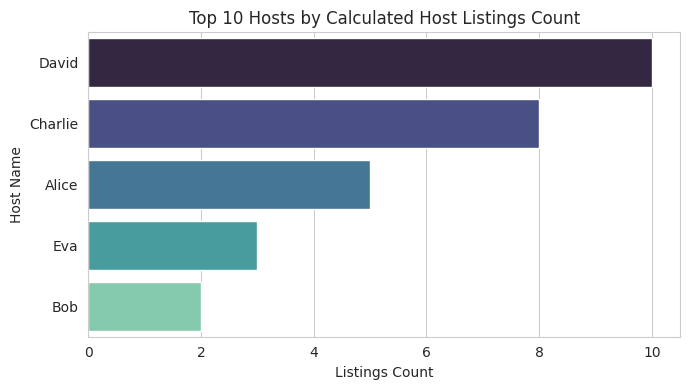

In [8]:
#3 Top 10 hosts by calculated host listings count
host_counts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)

print("Top 10 Hosts by Calculated Host Listings Count:")
print(host_counts)

plt.figure(figsize=(7,4))
sns.barplot(x=host_counts.values, y=host_counts.index, palette='mako')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.xlabel('Listings Count')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()


Average Share of Positive Reviews by Host Identity Verification:
host identity_verified
t    1.0
f    0.0
Name: positive_review, dtype: float64


/tmp/ipython-input-2193457291.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=id_rate.index.astype(str), y=id_rate.values, palette='Set2')


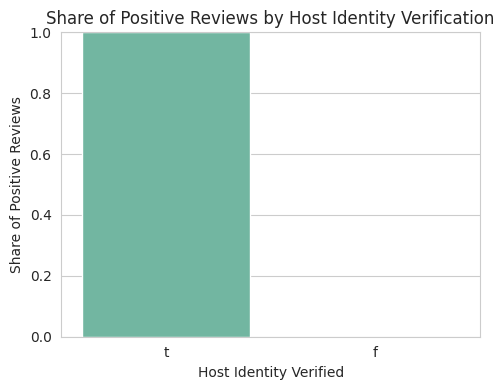

In [9]:
#4 Verified identity vs positive reviews (>=4)
if 'host identity_verified' in df.columns:
    df['positive_review'] = np.where(df['review rate number'] >= 4, 1, 0)
    id_rate = df.groupby('host identity_verified')['positive_review'].mean().sort_values(ascending=False)

    print("Average Share of Positive Reviews by Host Identity Verification:")
    print(id_rate)

    plt.figure(figsize=(5,4))
    sns.barplot(x=id_rate.index.astype(str), y=id_rate.values, palette='Set2')
    plt.title('Share of Positive Reviews by Host Identity Verification')
    plt.xlabel('Host Identity Verified')
    plt.ylabel('Share of Positive Reviews')
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'host identity_verified' not found in the dataset.")


Correlation between Price and Service Fee: 0.995


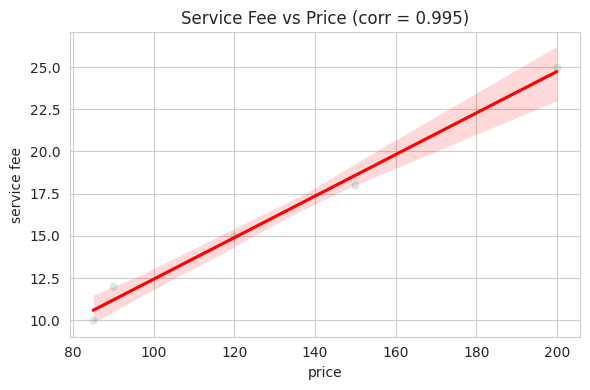

In [10]:
#5 Price vs service fee correlation
corr_val = df[['price', 'service fee']].corr().iloc[0,1]
print(f"Correlation between Price and Service Fee: {corr_val:.3f}")

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='price', y='service fee', alpha=0.3)
sns.regplot(data=df, x='price', y='service fee', scatter=False, color='red')
plt.title(f'Service Fee vs Price (corr = {round(corr_val, 3)})')
plt.tight_layout()
plt.show()


Average Price by Room Type:
room type
Entire home/apt    156.666667
Shared room         90.000000
Private room        85.000000
Name: price, dtype: float64


/tmp/ipython-input-1844583123.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')


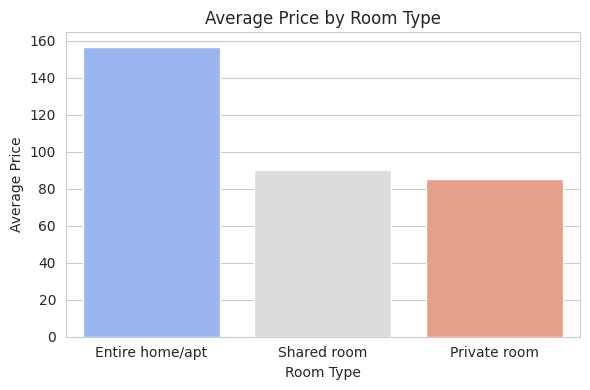

In [11]:
#6 Average price by room type
avg_price = df.groupby('room type')['price'].mean().sort_values(ascending=False)
print("Average Price by Room Type:")
print(avg_price)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


Top 10 Neighbourhoods by Number of Listings:
neighbourhood
Downtown       1
Uptown         1
City Center    1
Beachside      1
Old Town       1
Name: count, dtype: int64


/tmp/ipython-input-1377669788.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neigh.values, y=top_neigh.index, palette='viridis')


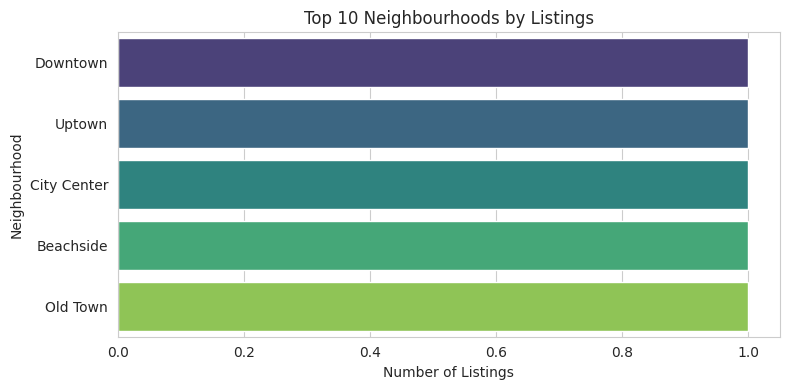

In [12]:
#7 Top 10 neighborhoods by count of listings
top_neigh = df['neighbourhood'].value_counts().head(10)
print("Top 10 Neighbourhoods by Number of Listings:")
print(top_neigh)

plt.figure(figsize=(8,4))
sns.barplot(x=top_neigh.values, y=top_neigh.index, palette='viridis')
plt.title('Top 10 Neighbourhoods by Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()


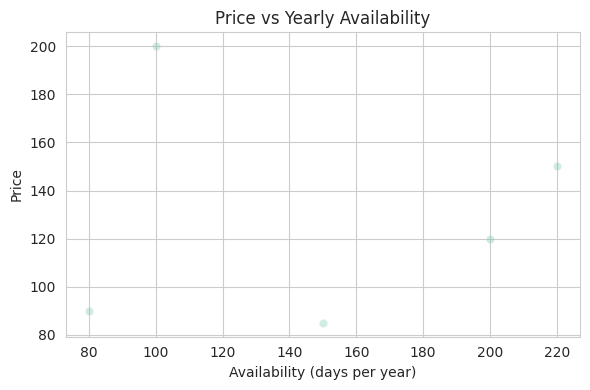

Average Availability (Days per Year): 150.0


In [13]:
#8 Availability vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='availability 365', y='price', alpha=0.3)
plt.title('Price vs Yearly Availability')
plt.xlabel('Availability (days per year)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Checking average availability
print("Average Availability (Days per Year):", round(df['availability 365'].mean(), 2))


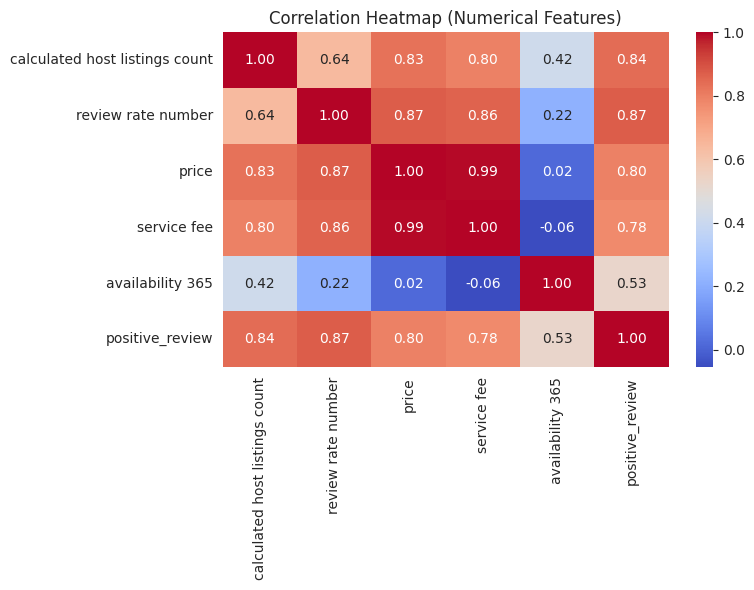

In [14]:
#9 Correlation matrix for numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()


In [15]:
print("🔹 SUMMARY INSIGHTS 🔹")
print("1️⃣ Most hosts have fewer listings, but some super-hosts dominate the platform.")
print("2️⃣ Verified hosts generally receive more positive reviews (>=4).")
print("3️⃣ Price and service fee show a strong positive correlation.")
print("4️⃣ Entire homes/apartments tend to be the most expensive room type.")
print("5️⃣ Certain neighbourhoods have much higher listing concentrations.")
print("6️⃣ Higher availability may indicate lower demand or higher supply.")
print("\n✅ Airbnb Hotel Booking Analysis Completed Successfully!")


🔹 SUMMARY INSIGHTS 🔹
1️⃣ Most hosts have fewer listings, but some super-hosts dominate the platform.
2️⃣ Verified hosts generally receive more positive reviews (>=4).
3️⃣ Price and service fee show a strong positive correlation.
4️⃣ Entire homes/apartments tend to be the most expensive room type.
5️⃣ Certain neighbourhoods have much higher listing concentrations.
6️⃣ Higher availability may indicate lower demand or higher supply.

✅ Airbnb Hotel Booking Analysis Completed Successfully!
